#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
from sklearn.model_selection import train_test_split as tts
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import  train_test_split as tts
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Part 1

In [2]:
columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',names=columns)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

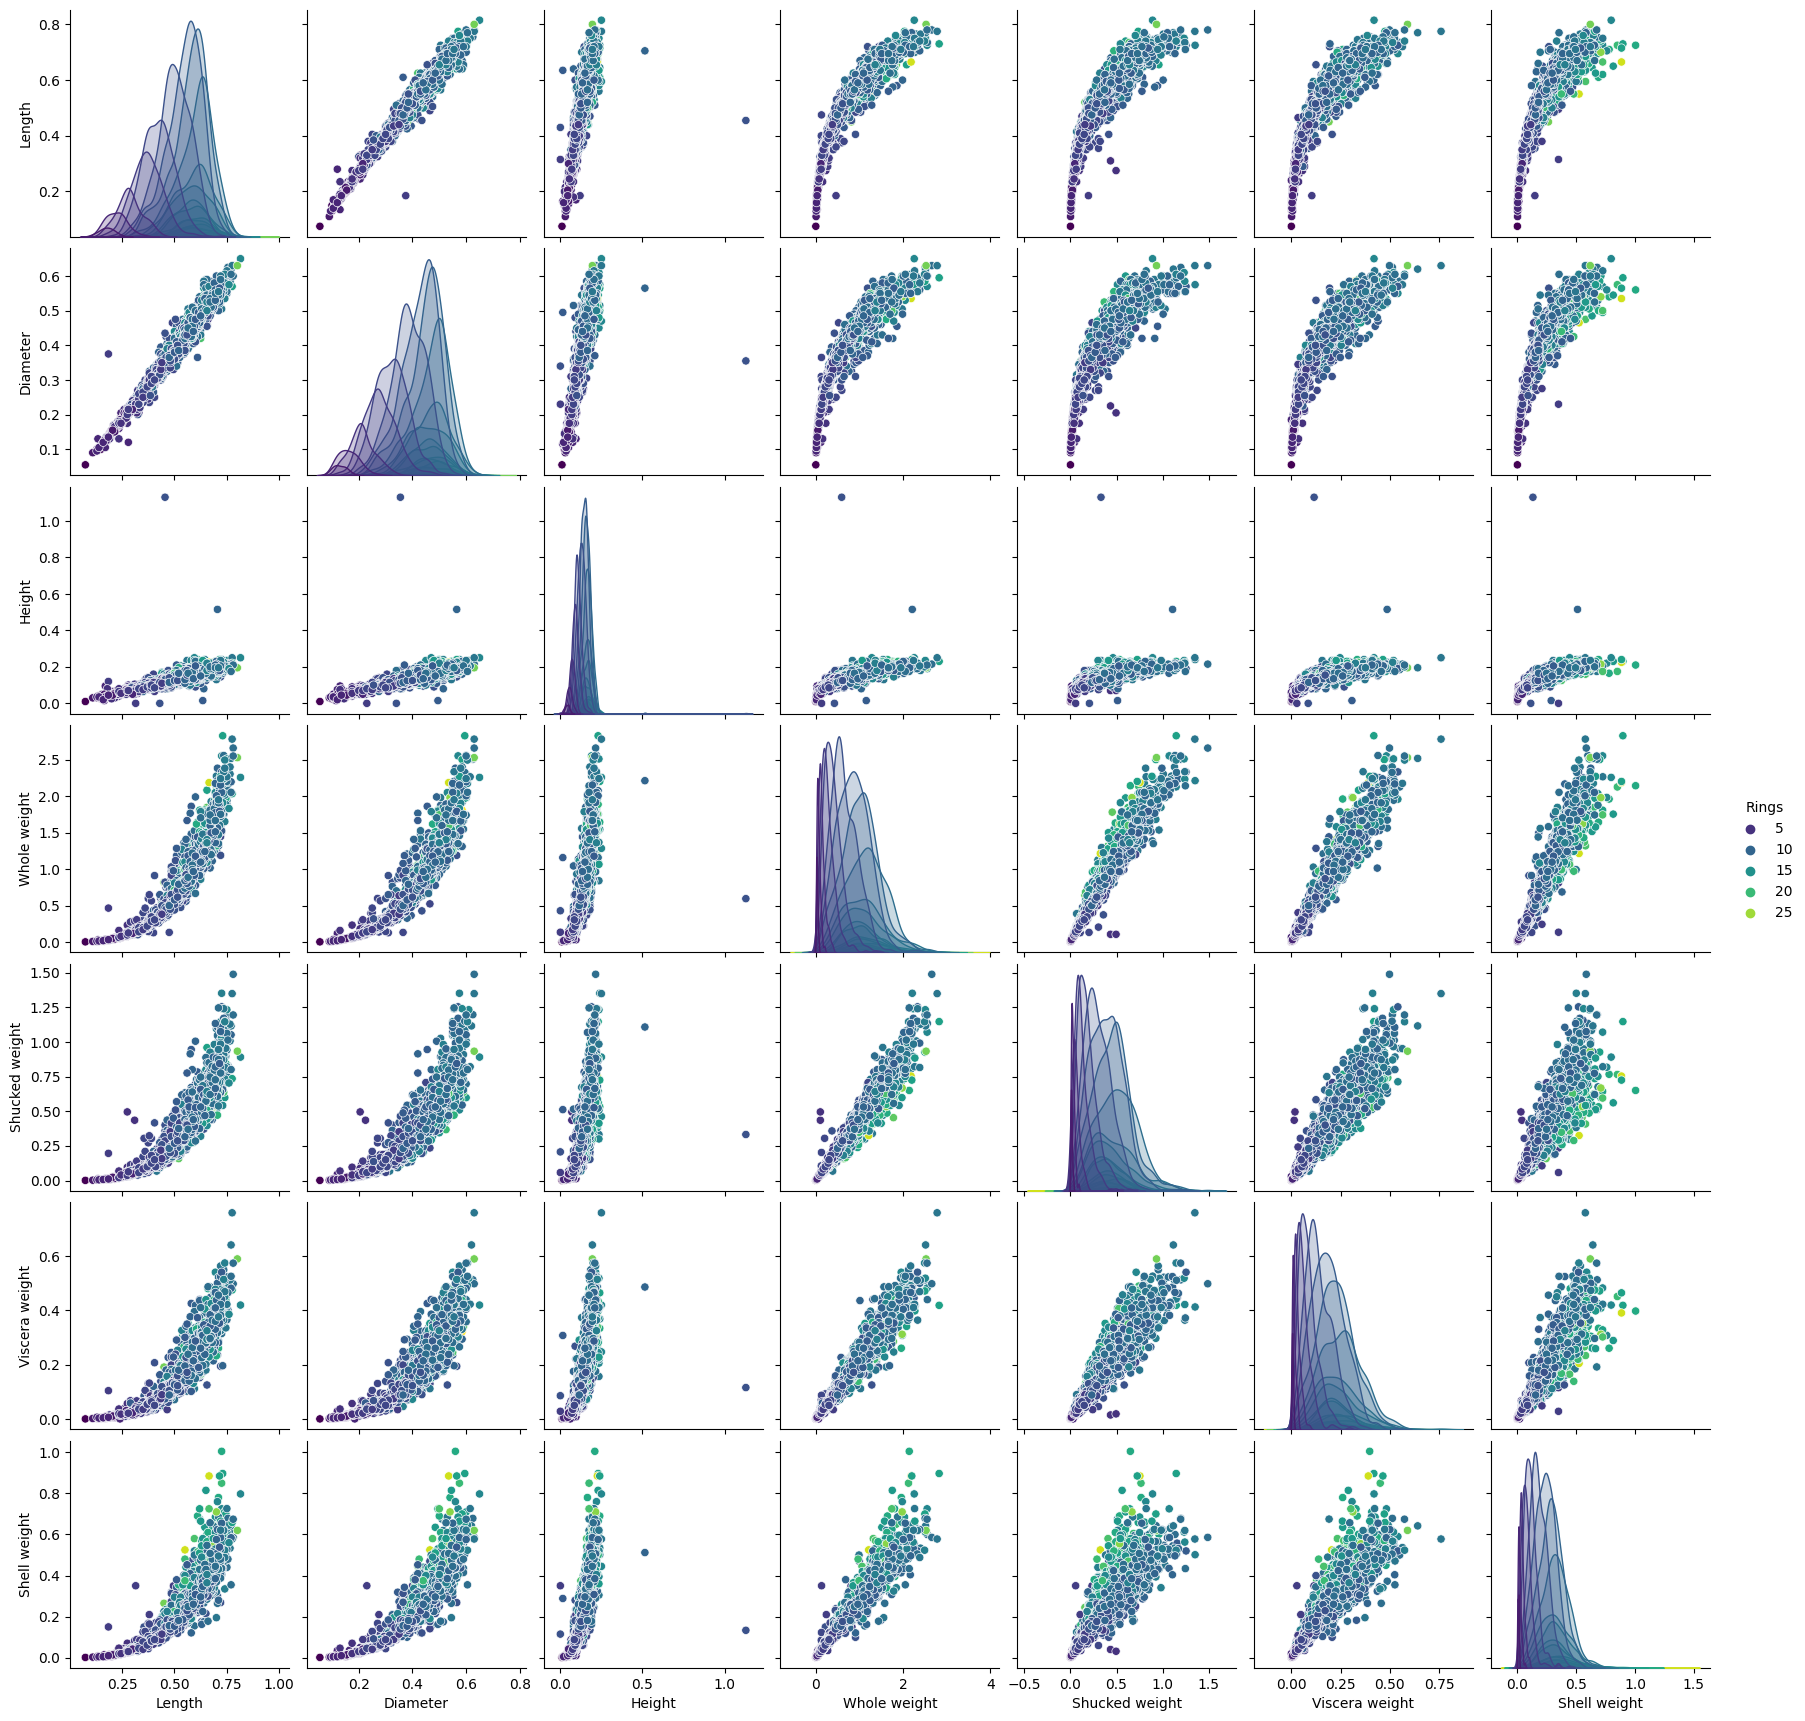

In [4]:
sns.pairplot(data=df,hue='Rings',palette='viridis')

In [5]:
df['Sex']=df['Sex'].replace(['M','F','I'],[0,1,2]).astype(int)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [25]:
class_no=[]
for n_rings in df['Rings']:
    if(n_rings<8):
        class_no.append(0)
    elif(n_rings<13):
        class_no.append(1)
    elif(n_rings<18):
        class_no.append(2)
    else:
        class_no.append(3)

df['Class']=class_no
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Class
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [26]:
df['Class'].value_counts()

1    2645
0     839
2     557
3     136
Name: Class, dtype: int64

In [27]:
X=df.drop(['Rings','Class'],axis=1).to_numpy()
y=df['Class'].to_numpy()
#split is going to be done in 50:20:30 ratio

std_sc=StandardScaler()
X=std_sc.fit_transform(X)

def startified_split(X,y,test_size):
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]

    for label in np.unique(y):
        idx=np.where(y==label)[0]
        np.random.shuffle(idx)
        split=(int)(len(idx)*test_size)
        

        train_idx=idx[split:]
        test_idx=idx[:split]
        if(split==0):
            X_train.extend(X[idx])
            y_train.extend(y[idx])
            X_test.extend(X[idx])
            y_test.extend(y[idx])
        else:
            X_train.extend(X[train_idx])
            y_train.extend(y[train_idx])
            X_test.extend(X[test_idx])
            y_test.extend(y[test_idx])
    return np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)


X_temp,X_test,y_temp,y_test=startified_split(X,y,0.3)
X_train,X_valid,y_train,y_valid=startified_split(X_temp,y_temp,(0.2/0.7))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_valid.shape,y_valid.shape)

print()




(2091, 8) (1251, 8) (2091,) (1251,) (835, 8) (835,)



In [28]:
print('Classes present in training data along with their counts')
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

print('Classes present in testing data along with their counts')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Classes present in validation data along with their counts')
unique, counts = np.unique(y_valid, return_counts=True)
print(np.asarray((unique, counts)).T)

Classes present in training data along with their counts
[[   0  420]
 [   1 1323]
 [   2  279]
 [   3   69]]
Classes present in testing data along with their counts
[[  0 251]
 [  1 793]
 [  2 167]
 [  3  40]]
Classes present in validation data along with their counts
[[  0 168]
 [  1 529]
 [  2 111]
 [  3  27]]


##Part 2

In [29]:
def numpy_to_dataset_loader(X,y):
    
    tensor_x = torch.Tensor(X) # transform to torch tensor
    tensor_y = torch.Tensor(y)
    tensor_y=tensor_y.long()

    my_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
    my_dataloader = torch.utils.data.DataLoader(my_dataset,batch_size=64,shuffle=False)
    return my_dataloader

In [30]:
train_loader = numpy_to_dataset_loader(X_train,y_train)
val_loader = numpy_to_dataset_loader(X_valid,y_valid)
test_loader = numpy_to_dataset_loader(X_test,y_test)

##Part 3

In [41]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size_1,hidden_size_2,output_size):
        super(MLP,self).__init__()
        self.w1=nn.Linear(input_size,hidden_size_1)
        self.w2=nn.Linear(input_size,hidden_size_2)
        self.w3=nn.Linear(hidden_size_1,output_size)
        self.w4=nn.Linear(hidden_size_2,output_size)

    def forward(self,x):
        x1=self.w1(x)
        x1=nn.functional.sigmoid(x1)
        x2=self.w2(x)
        x2=nn.functional.sigmoid(x2)
        x1=self.w3(x1)
        x1=nn.functional.sigmoid(x1)
        x2=self.w4(x2)
        x2=nn.functional.sigmoid(x2)
        x=x1+x2
        return x


In [46]:

mlp=MLP(8,256,256,4)
no_of_trainable_parameters=0
for p in mlp.parameters():
    if(p.requires_grad):
        no_of_trainable_parameters+=p.numel()

print('No of trainable parameters are ',no_of_trainable_parameters)

No of trainable parameters are  6664


##Part 4

In [47]:


num_epochs=50

optimizer=optim.Adam(mlp.parameters())
loss_func=nn.CrossEntropyLoss()

train_accs=[]
train_losses=[]
val_accs=[]
val_losses=[]


best_val_acc=0
best_model=mlp

for epoch in range(num_epochs):
    mlp.train()
    train_acc=0
    train_loss=0
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        # inputs=inputs.reshape(-1,28*28)
        outputs=mlp(inputs)
        
        loss=loss_func(outputs,labels)
        
        loss.backward()
        optimizer.step()

        train_loss+=loss.item()*inputs.size(0)
        _,predicted=torch.max(outputs.data,1)
        train_acc+=(predicted==labels).sum().item()
    train_loss=train_loss/len(X_train)
    train_acc=train_acc/len(X_train)

    mlp.eval()

    val_loss=0
    val_acc=0

    with torch.no_grad():
        for inputs,labels in val_loader:
            # inputs=inputs.reshape(-1,28*28)
            outputs=mlp(inputs)
            loss=loss_func(outputs,labels)


            val_loss+=loss.item()*inputs.size(0)
            _,predicted=torch.max(outputs.data,1)
            val_acc+=(predicted==labels).sum().item()

            



                


    val_loss=val_loss/len(X_valid)
    val_acc=val_acc/len(X_valid)
    if(best_val_acc<val_acc):
        best_val_acc=val_acc
        best_model=mlp

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    if (epoch%10==0):

        print(f'Epoch {epoch+1}/{num_epochs}: train_loss: {train_loss}, train_accuracy: {train_acc}, val_loss: {val_loss}, val_accuracy: {val_acc}')



    


Epoch 1/50: train_loss: 1.4117125114831326, train_accuracy: 0.3218555714968914, val_loss: 1.0030271590112927, val_accuracy: 0.6335329341317365
Epoch 11/50: train_loss: 0.8970471512809546, train_accuracy: 0.664753706360593, val_loss: 0.8597219155934043, val_accuracy: 0.6718562874251497
Epoch 21/50: train_loss: 0.8646286976274721, train_accuracy: 0.7039693926351028, val_loss: 0.8277326141288894, val_accuracy: 0.7269461077844311
Epoch 31/50: train_loss: 0.8456686077820291, train_accuracy: 0.7130559540889526, val_loss: 0.8136928818183031, val_accuracy: 0.7305389221556886
Epoch 41/50: train_loss: 0.834930387083735, train_accuracy: 0.7164036346245816, val_loss: 0.8058968501176663, val_accuracy: 0.7341317365269461


In [48]:
mlp=best_model
mlp.eval()

test_loss=0
test_acc=0

with torch.no_grad():
    for inputs,labels in test_loader:
        # inputs=inputs.reshape(-1,28*28)
        outputs=mlp(inputs)
        loss=loss_func(outputs,labels)


        test_loss+=loss.item()*inputs.size(0)
        _,predicted=torch.max(outputs.data,1)
        test_acc+=(predicted==labels).sum().item()

        



            


test_loss=test_loss/len(X_test)
test_acc=test_acc/len(X_test)
print(f'test_loss: {test_loss}, test_accuracy: {test_acc}')

test_loss: 0.7960155498114326, test_accuracy: 0.7442046362909672


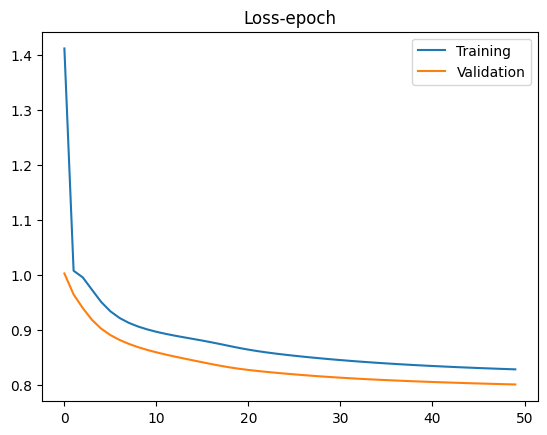

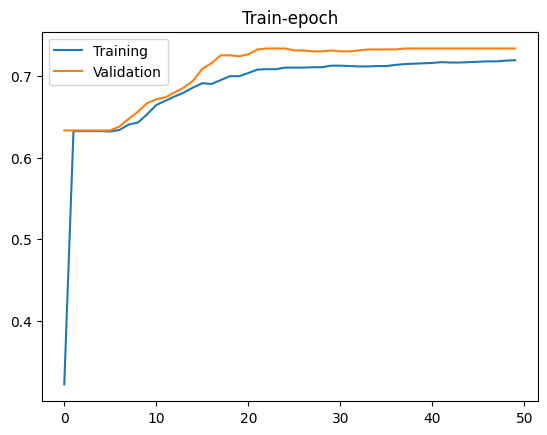

In [49]:
for title,train,val in zip(['Loss-epoch','Train-epoch'],[train_losses,train_accs],[val_losses,val_accs]):
    plt.plot(train,label='Training')
    plt.plot(val,label='Validation')
    plt.title(title)
    plt.legend()
    plt.show()